## **<u>Multiple Correspondence Analysis (MCA)</u>**  ##

- Subset of PCA
- Use Multiple Correspondence Analysis (MCA) for Categorical data

### **<u>Tutorial Videos</u>** ###
- How it works?: https://youtu.be/5vgP05YpKdE?si=r14pRvvXkhheQex4
- The math behind it: https://youtu.be/fkf4IBRSeEc?si=PxAdZ_9Cc3zVVV6Q

### **<u>Code reference from Kaggle</u>** ###
- https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

df = pd.read_csv('../data/cleaned_data.csv')

df.drop(columns=['Respondent ID'], inplace=True)
df['Total exterior parts to customise'] = df.apply(lambda row: len(row['Exterior components to customise'].split(';')), axis=1)
df['Total interior parts to customise'] = df.apply(lambda row: len(row['Interior components to customise'].split(';')), axis=1)
df['Total factors to buy car'] = df.apply(lambda row: len(row['Deciding factors to buy car'].split(';')), axis=1)


df.head(1)

,Age group,Gender,Category,Marital status,Deciding factors to buy car,Likelihood of customised vehicle if FOC,Exterior components to customise,Interior components to customise,Customisation Budget,Interest in personalising car,Personalisation Budget,Any cadding experience,Singaporean design idea feedback,Total exterior parts to customise,Total interior parts to customise,Total factors to buy car
0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,under 500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",-,1,1,4


In [2]:
numcols = df.select_dtypes(['number']).columns
catcols = df.select_dtypes(['object']).columns

print(numcols, catcols, sep='\n\n')

Index(['Total exterior parts to customise',
       'Total interior parts to customise', 'Total factors to buy car'],
      dtype='object')

Index(['Age group', 'Gender', 'Category', 'Marital status',
       'Deciding factors to buy car',
       'Likelihood of customised vehicle if FOC',
       'Exterior components to customise', 'Interior components to customise',
       'Customisation Budget', 'Interest in personalising car',
       'Personalisation Budget', 'Any cadding experience',
       'Singaporean design idea feedback'],
      dtype='object')


In [3]:
df[catcols] = df[catcols].astype('category')
# df.drop(columns=['Exterior components to customise', 'Interior components to customise', 'Deciding factors to buy car'], inplace=True)
df.drop(columns=['Deciding factors to buy car', 'Exterior components to customise', 'Singaporean design idea feedback', 'Interior components to customise'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Age group                                50 non-null     category
 1   Gender                                   50 non-null     category
 2   Category                                 50 non-null     category
 3   Marital status                           50 non-null     category
 4   Likelihood of customised vehicle if FOC  50 non-null     category
 5   Customisation Budget                     50 non-null     category
 6   Interest in personalising car            50 non-null     category
 7   Personalisation Budget                   50 non-null     category
 8   Any cadding experience                   50 non-null     category
 9   Total exterior parts to customise        50 non-null     int64   
 10  Total interior parts to customise       

### **<u>Categorical features for MCA</u>** ###

- Age group
- Gender   
- Category 
- Marital status                         
- Likelihood of customised vehicle if FOC    
- Customisation Budget                   
- Interest in personalising car          
- Personalisation Budget                 
- Any cadding experience                 

### **<u>Continuous features for PCA</u>** ###

- Total exterior parts to customise
- Total interior parts to customise
- Total factors to buy car

In [4]:
pca_cols = df.select_dtypes(['number']).columns
print(len(pca_cols), 'features used for PCA are', pca_cols.tolist())

mca_cols = df.select_dtypes(['category']).columns
# mca_cols = mca_cols.drop()
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

3 features used for PCA are ['Total exterior parts to customise', 'Total interior parts to customise', 'Total factors to buy car']
9 features used for MCA are ['Age group', 'Gender', 'Category', 'Marital status', 'Likelihood of customised vehicle if FOC', 'Customisation Budget', 'Interest in personalising car', 'Personalisation Budget', 'Any cadding experience']


## **PCA** ##

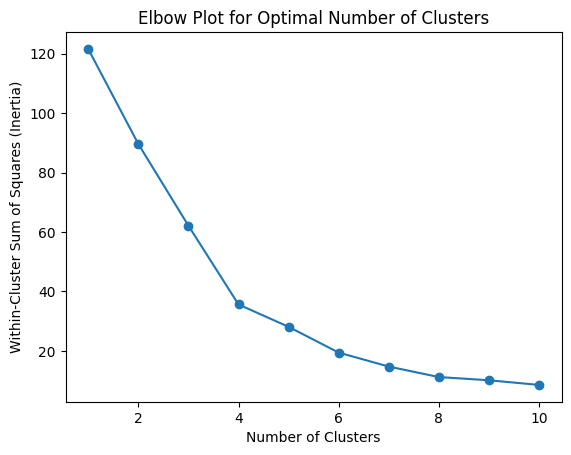

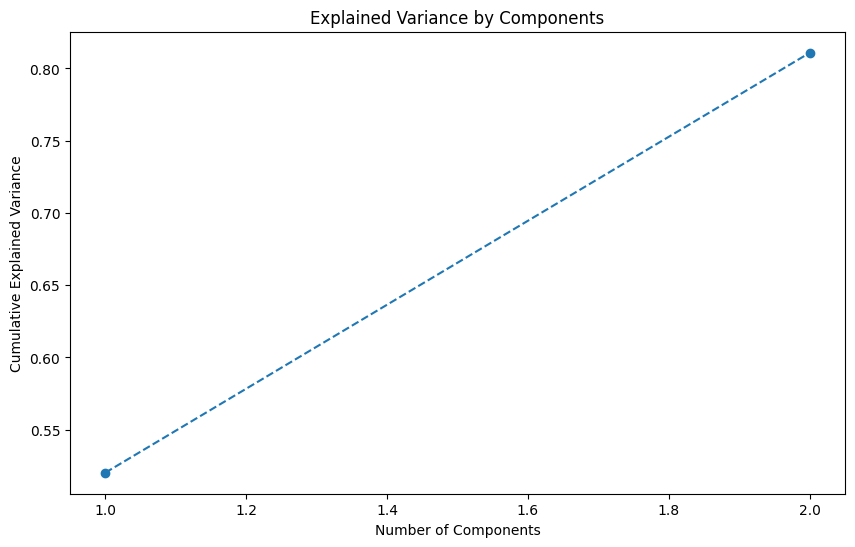

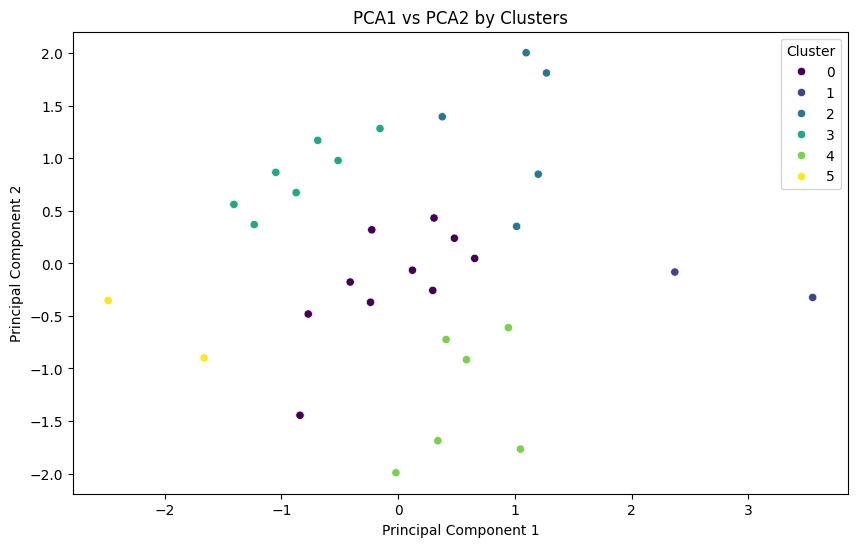

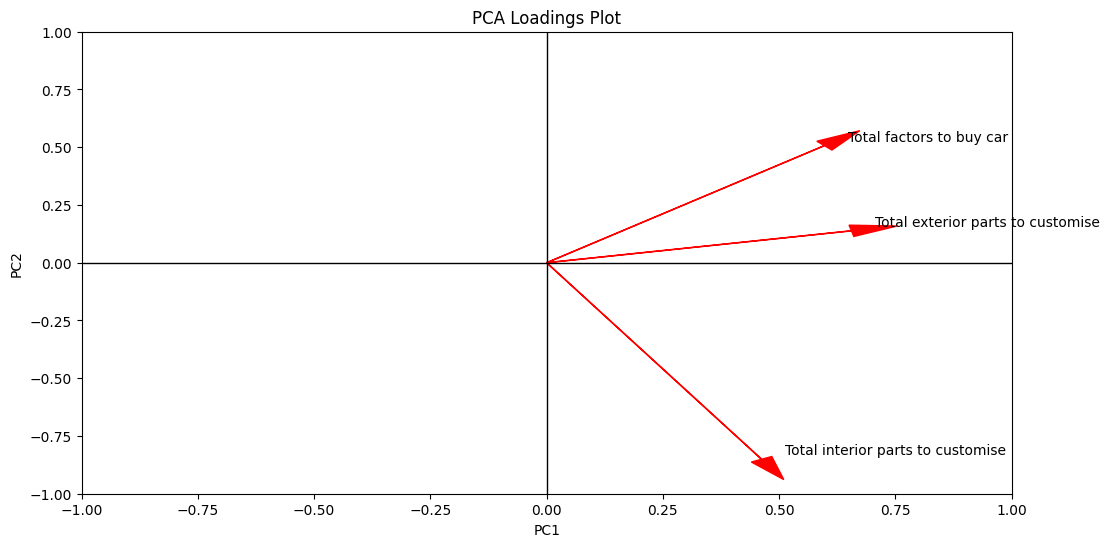

Explained Variance Ratios:
[0.52024524 0.29059548]
Cumulative Explained Variance:
[0.52024524 0.81084072]


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

scaler = StandardScaler()
pca = PCA(n_components=2)

# Fit and transform the data with PCA
df[pca_cols] = scaler.fit_transform(df[pca_cols])
pca_result = pca.fit_transform(df[pca_cols])

# Elbow plot to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# Choose the number of clusters (k) and fit KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster_label'] = kmeans.fit_predict(pca_result[:, :2]) 



# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Plot PCA1 vs PCA2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster_label'], palette='viridis')
plt.title('PCA1 vs PCA2 by Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

loadings = pca.components_.T  
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df[pca_cols].columns)

fig, ax = plt.subplots(figsize=(12, 6))
for i, v in enumerate(loading_matrix.values):
    ax.arrow(0, 0, v[0], v[1], 
             head_width=0.05, head_length=0.1, linestyle='-', color='red')
    ax.text(v[0] + 0.05, v[1] + 0.02, loading_matrix.index[i], color='black')

plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.title('PCA Loadings Plot')
plt.show()

# Print explained variance ratios
print("Explained Variance Ratios:")
print(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:")
print(pca.explained_variance_ratio_.cumsum())

### **<u>PCA Analysis</u>** ###

- PCA here is not very ideal as the total number of dimensions is only 3 to begin with (3 columns stated under continous features for PCA)

- The purpose of PCA to reduce large dimensions like 30 cols to 2-5 cols

- In this example, I will show that it will still work in reducing 3 dimensions to 2 while retaining 80% of its explained variance (0.81084072 meaning/importance of the data shown above)

- Purpose of <u>**ELBOW PLOT**</u>: https://builtin.com/data-science/elbow-method --> helps in determine the optimal K value (number of clusters to set)

- The PCA Loadings plot shows the contributions of each column. The direction if im not mistaken is the eigenvector direction, the closer the positions of the cols (arrow), the better its relationship

- But again, this will be more meaningful if used on large dimensions dataset. It is worth noting this in the report. The data they gave, has no Numerical Variables

- For the **<u>numerical variables</u>**, refer to the `data_analysis.ipynb` file, the last few cells. For small dimension dataset, can just use `scatter plot`, `regression analysis`, `correlation analysis`, etc

- <u>**Can focus more on the MCA portion!!**</u>

## **MCA**

- Screeplot to determine how many components for MCA to retain meaning

In [6]:
from prince import MCA

categorical_cols = mca_cols

print(f"MCA FACTORS: {categorical_cols}")

# Extract categorical columns for MCA
data_for_mca = df[categorical_cols]

# Perform MCA
mca = MCA(n_components=5)
mca.fit(data_for_mca)

print(mca.eigenvalues_summary)

mca.scree_plot()


MCA FACTORS: Index(['Age group', 'Gender', 'Category', 'Marital status',
       'Likelihood of customised vehicle if FOC', 'Customisation Budget',
       'Interest in personalising car', 'Personalisation Budget',
       'Any cadding experience'],
      dtype='object')
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.285        12.84%                     12.84%
1              0.279        12.56%                     25.40%
2              0.230        10.35%                     35.75%
3              0.195         8.76%                     44.51%
4              0.172         7.73%                     52.24%


alt.Chart(...)

MCA FACTORS: Index(['Age group', 'Gender', 'Category', 'Marital status',
       'Likelihood of customised vehicle if FOC', 'Customisation Budget',
       'Interest in personalising car', 'Personalisation Budget',
       'Any cadding experience'],
      dtype='object')
          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.285        12.84%                     12.84%
1              0.279        12.56%                     25.40%


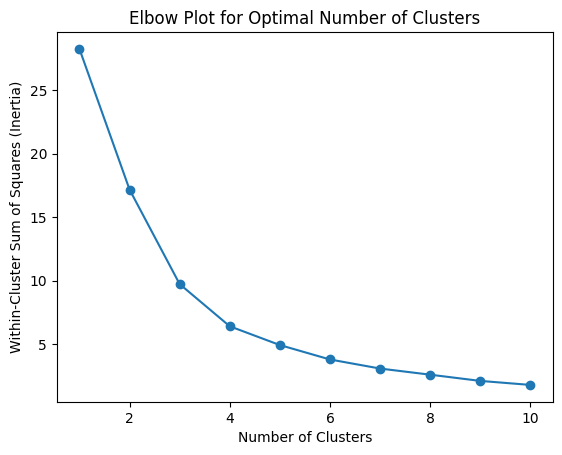

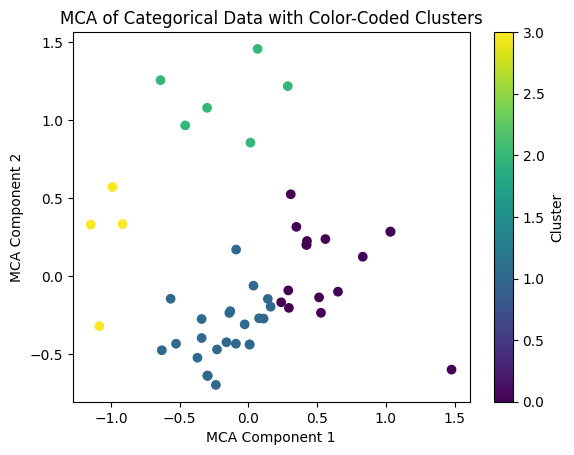

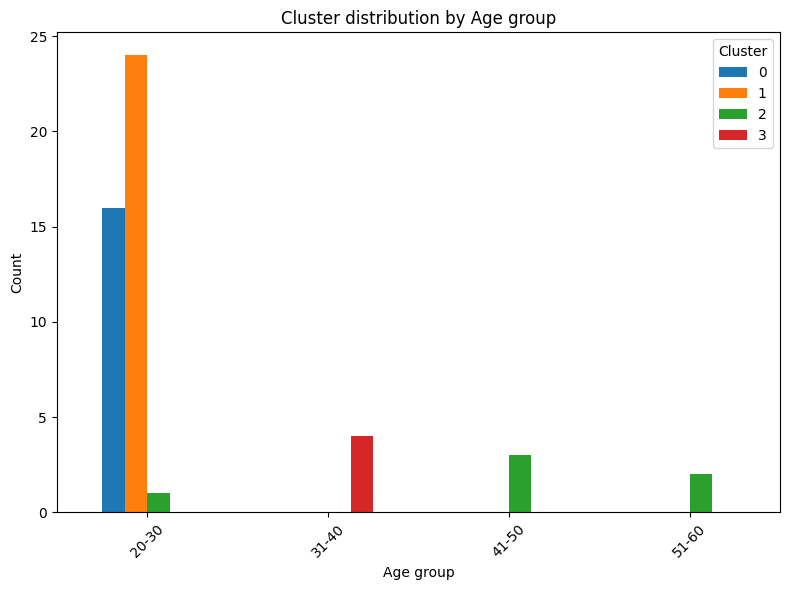

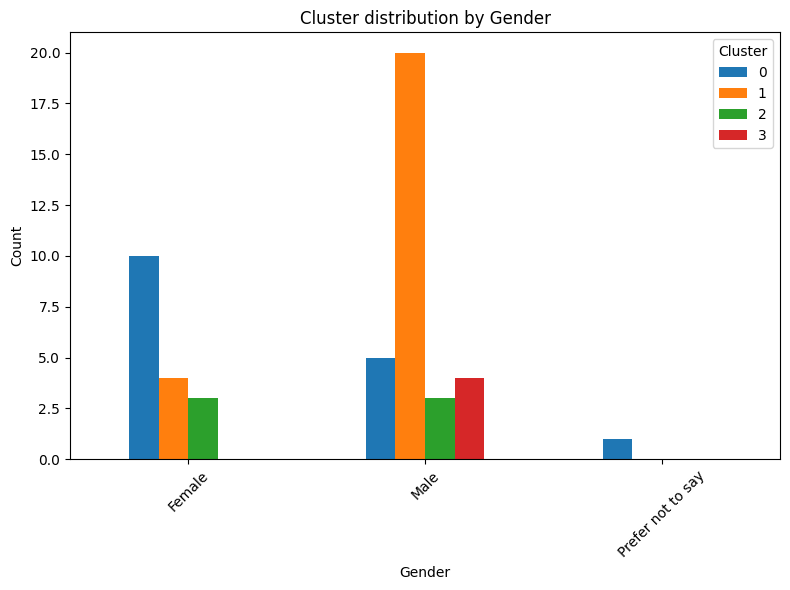

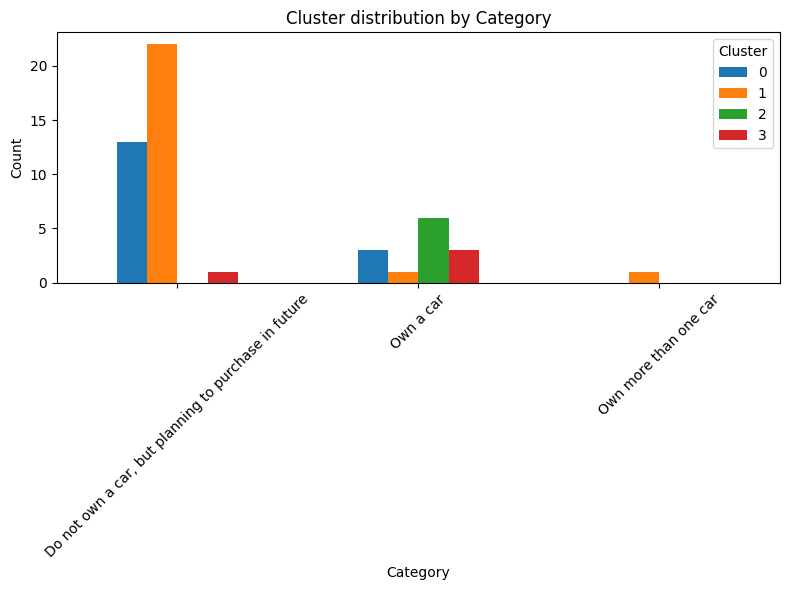

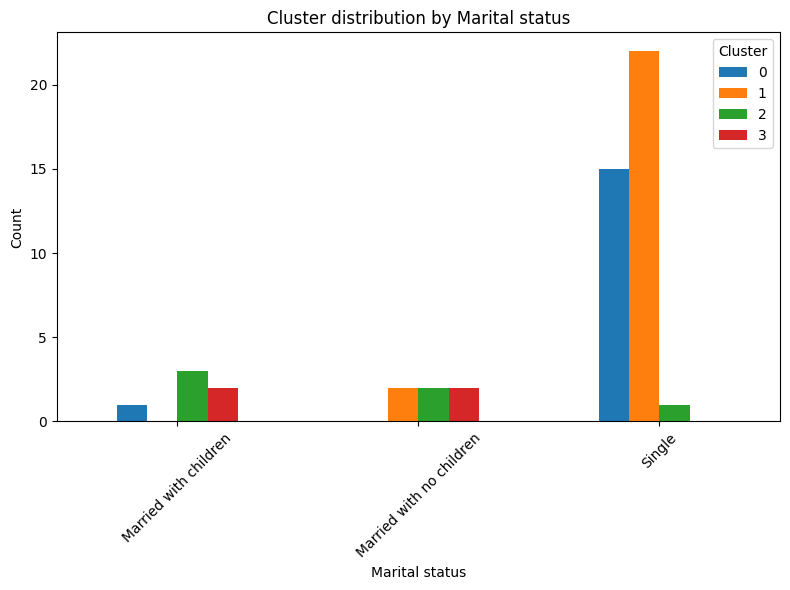

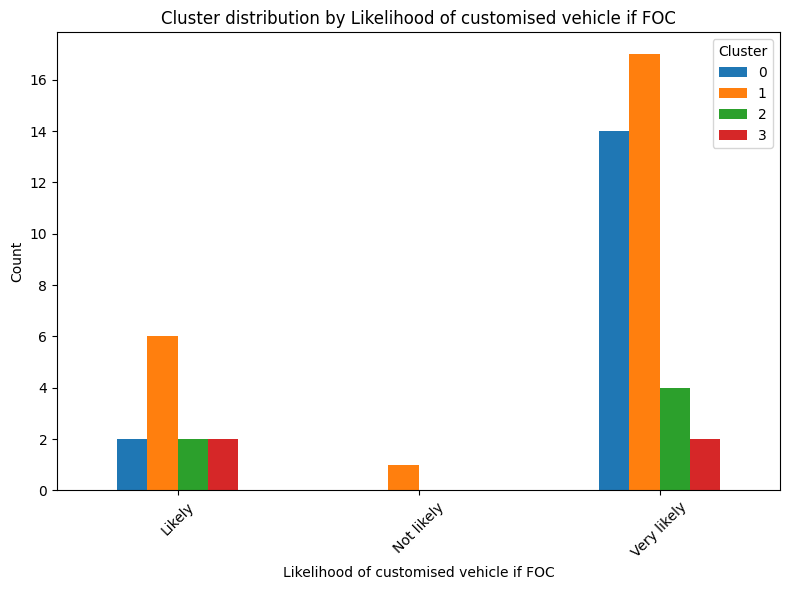

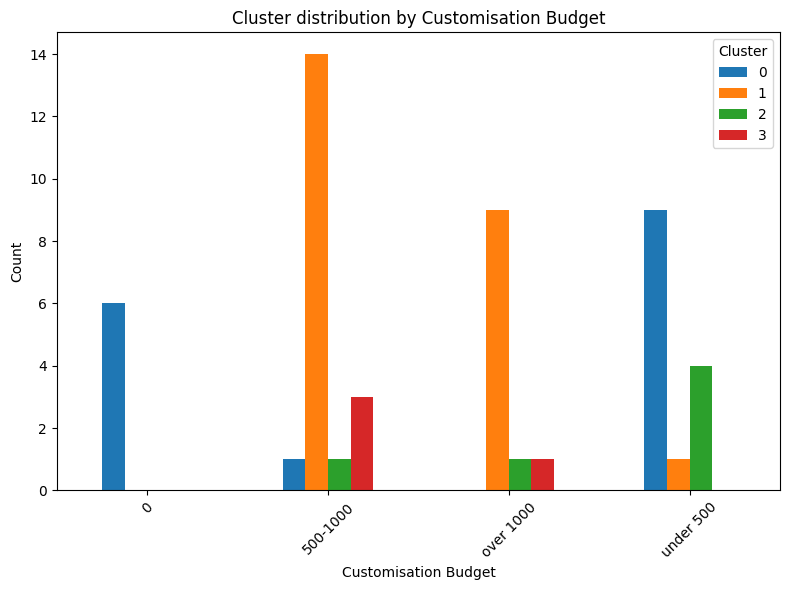

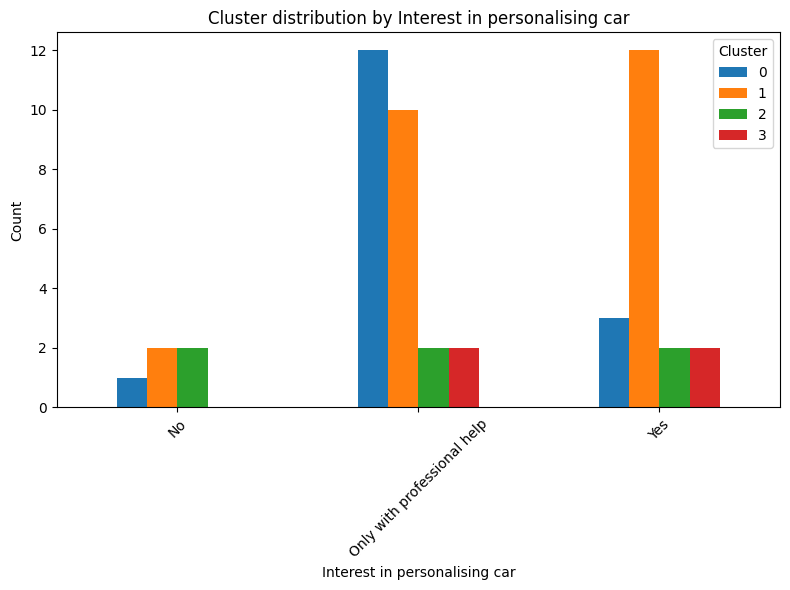

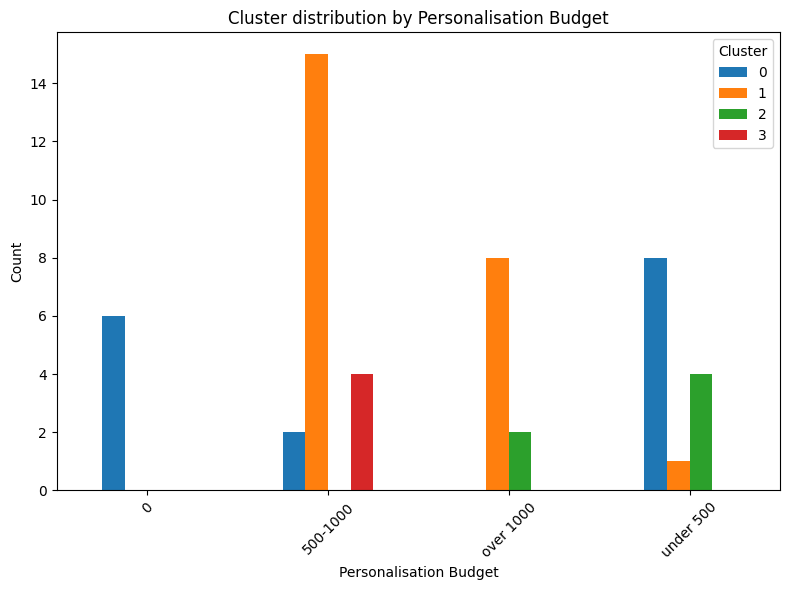

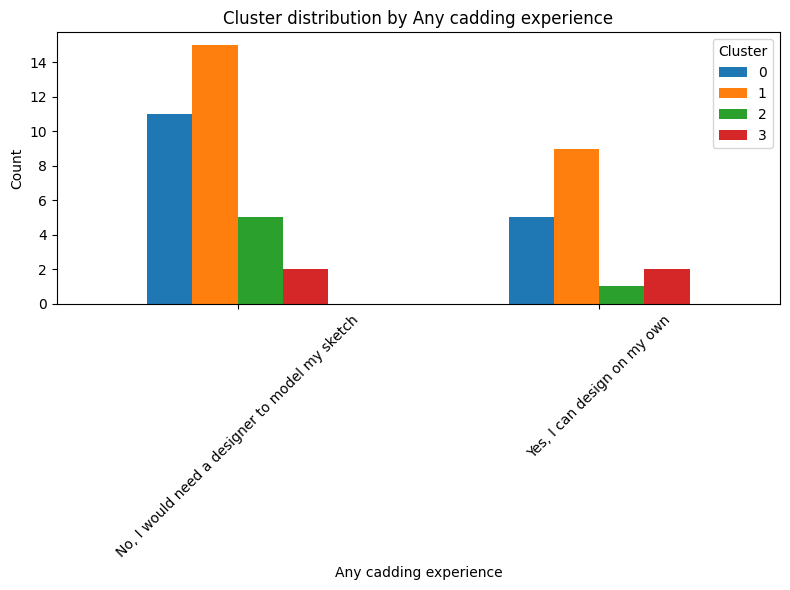

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from prince import MCA
from sklearn.cluster import KMeans

categorical_cols = mca_cols

print(f"MCA FACTORS: {categorical_cols}")

# Extract categorical columns for MCA
data_for_mca = df[categorical_cols]

# Perform MCA
mca = MCA(n_components=2)
mca.fit(data_for_mca)

print(mca.eigenvalues_summary)

mca.scree_plot()

X_mca = mca.transform(data_for_mca)


# Elbow plot to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_mca)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_mca)

# MCA plot with clusters
plt.scatter(X_mca.iloc[:, 0], X_mca.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of Categorical Data with Color-Coded Clusters')
plt.colorbar(label='Cluster')
plt.show()

def single_mode(series):
    return series.mode()[0]

# Cluster profiles
df['MCA1'] = X_mca.iloc[:, 0]
df['MCA2'] = X_mca.iloc[:, 1]
cluster_profiles = df.groupby('Cluster')[categorical_cols].agg(single_mode)

# Visualize cluster distributions for each categorical column
for col in categorical_cols:
    pd.crosstab(df[col], df['Cluster']).plot(kind='bar', figsize=(8, 6))
    plt.title(f'Cluster distribution by {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

## <u>**ANALYSIS</u>** ##

- Reducing from 9 dimensions to 2 only retains 25% of the explained variance

- MCA was not able to retain most of its importance, reducing it to 5 MCA components brings it to 52.24% explained variance

- But for ease of plotting, we will just reduce to 2 dimensions.

- Possible reasons why this does not work:
    - **Inherent Complexity**: Categorical data with 9 variables may have complex relationships that cannot be adequately captured in just two  dimensions. Some relationships might require more dimensions to be accurately represented.

- To improve, can consider more dimensions in the MCA(n_components = 5) for example, wont be able to visualise 5 dimensions


## **Plots** ##
<p>The analysis includes categorical data transformation, dimensionality reduction using Multiple Correspondence Analysis (MCA), clustering using KMeans, and evaluation of the resulting clusters. Here's what each cluster plot and component means:

1. **Elbow Plot for Optimal Number of Clusters**: This plot helps in determining the optimal number of clusters (k) for KMeans clustering. It plots the within-cluster sum of squares (inertia) against the number of clusters. The "elbow" point, where the rate of decrease sharply changes, suggests the optimal number of clusters. In this case, an elbow plot determines how many clusters best represent the variation within the MCA-transformed data.

2. **MCA of Categorical Data with Color-Coded Clusters**: After transforming the categorical data into two-dimensional space using MCA, this scatter plot visualizes the distribution of the data points (respondents) in this lower-dimensional space. Each point represents a respondent, and its color represents the cluster assigned by the KMeans algorithm. This plot provides a visual overview of how well the respondents are grouped based on their categorical answers in the MCA transformed space.

3. **Cluster Distribution by Each Categorical Column**: For each categorical column, a bar plot shows how many respondents from each cluster fall under each category within that variable. These plots are crucial for understanding how each cluster differs in terms of the variables considered. They provide detailed insights into the preferences or characteristics that define each cluster.
</p>

## **Chi-Square Test** ##

- Null hypothesis: indicates that the two variables have no significant relationship between them

- A low p-value (typically below a chosen significance level, often 0.05) suggests evidence to reject the null hypothesis, indicating a significant relationship or association between the variables.

- A high p-value suggests that there is not enough evidence to reject the null hypothesis, and it is reasonable to assume independence between the variables.

Age group vs Category: p-value = 0.0007038019158034461


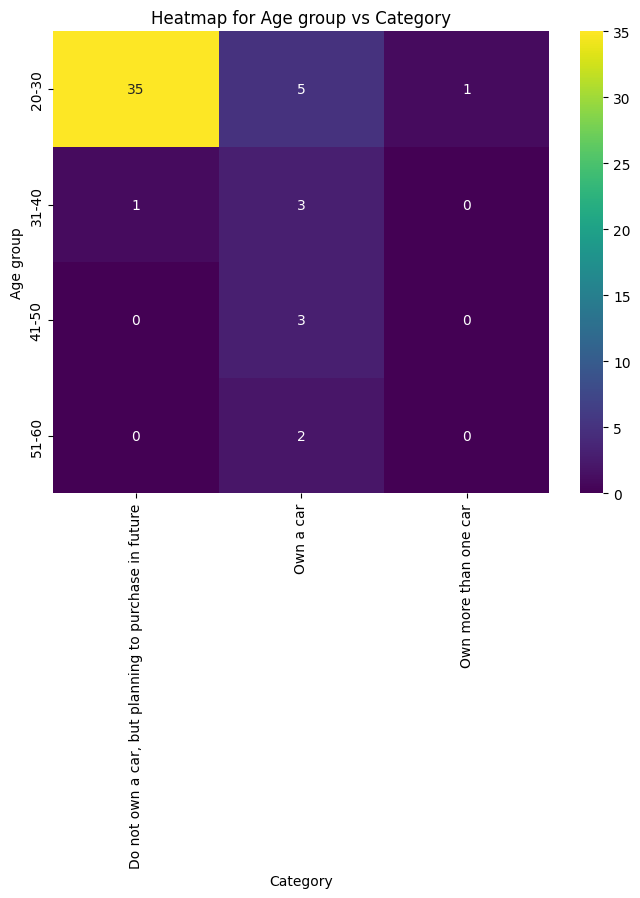

Age group vs Marital status: p-value = 3.7263510518624075e-07


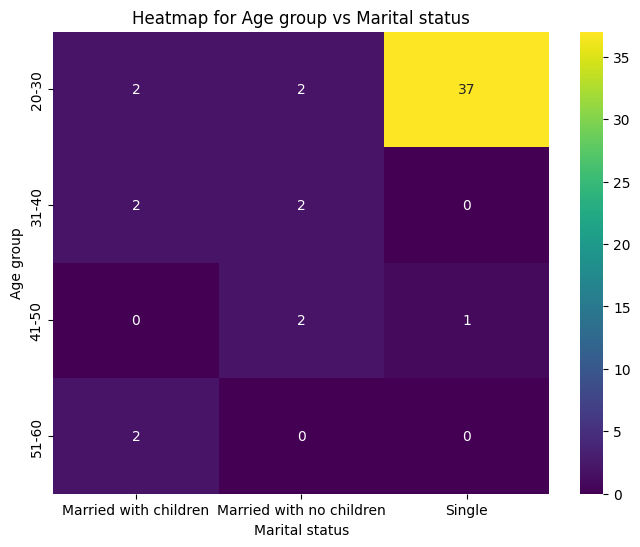

Gender vs Customisation Budget: p-value = 0.01880650825770613


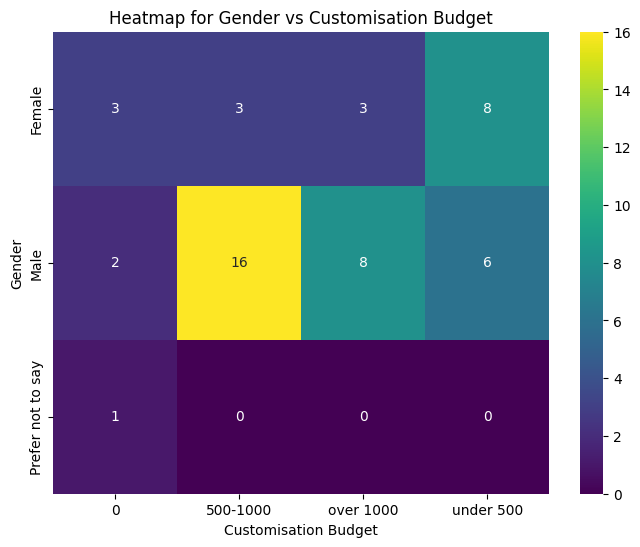

Category vs Age group: p-value = 0.0007038019158034484


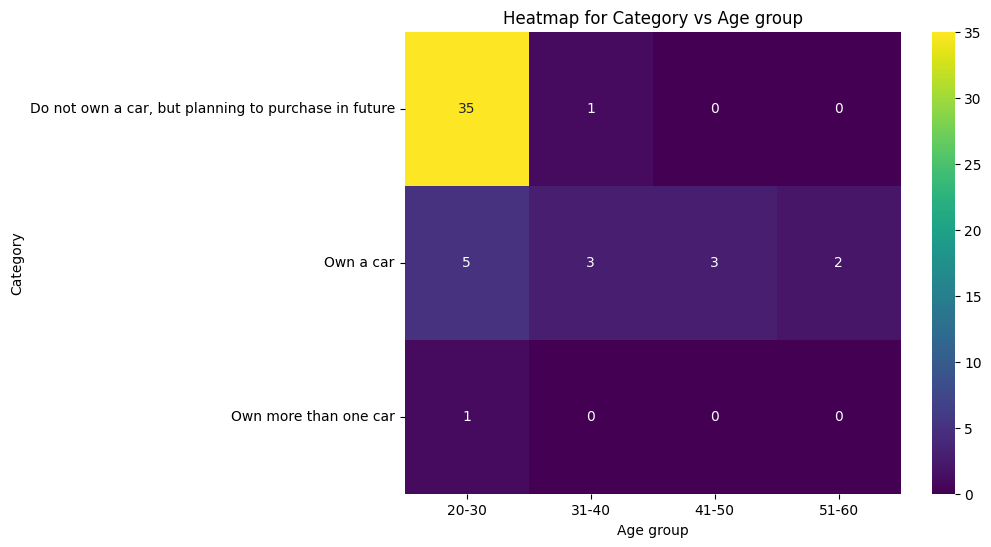

Category vs Marital status: p-value = 0.003969798738633992


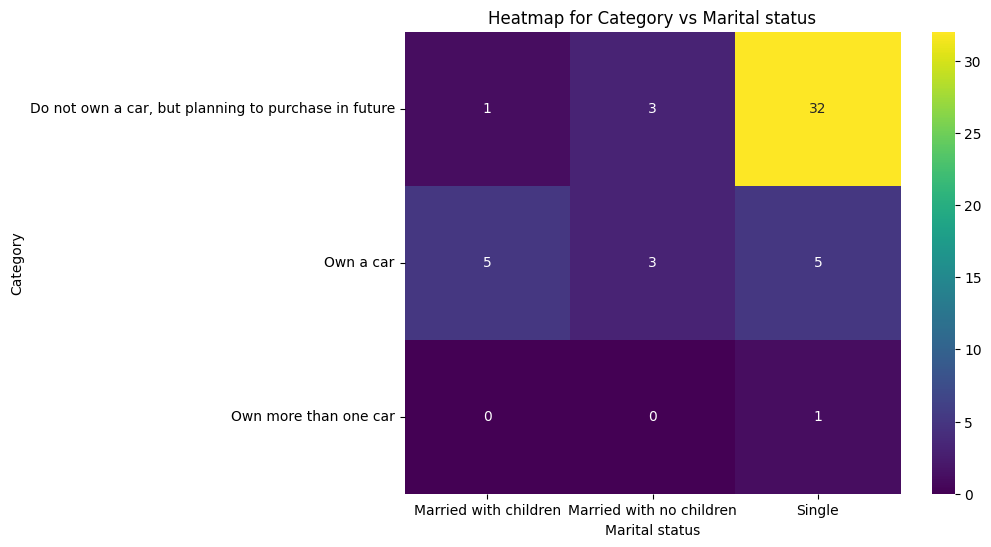

Marital status vs Age group: p-value = 3.726351051862414e-07


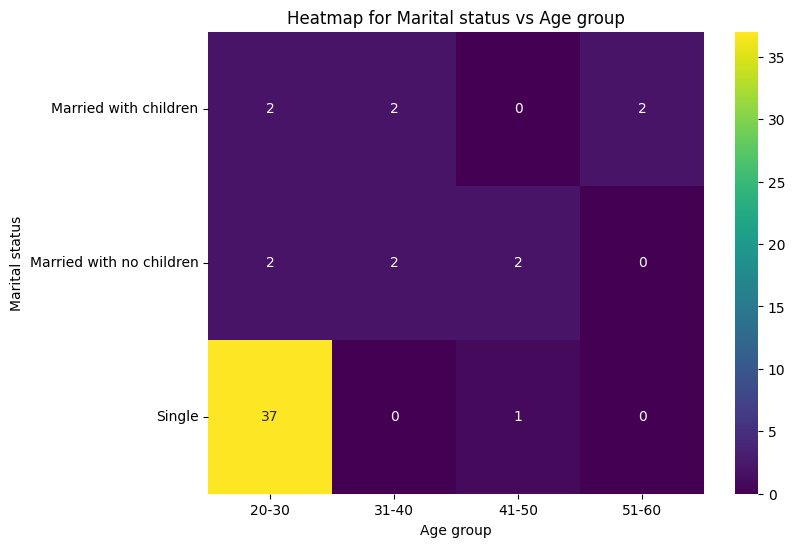

Marital status vs Category: p-value = 0.003969798738633996


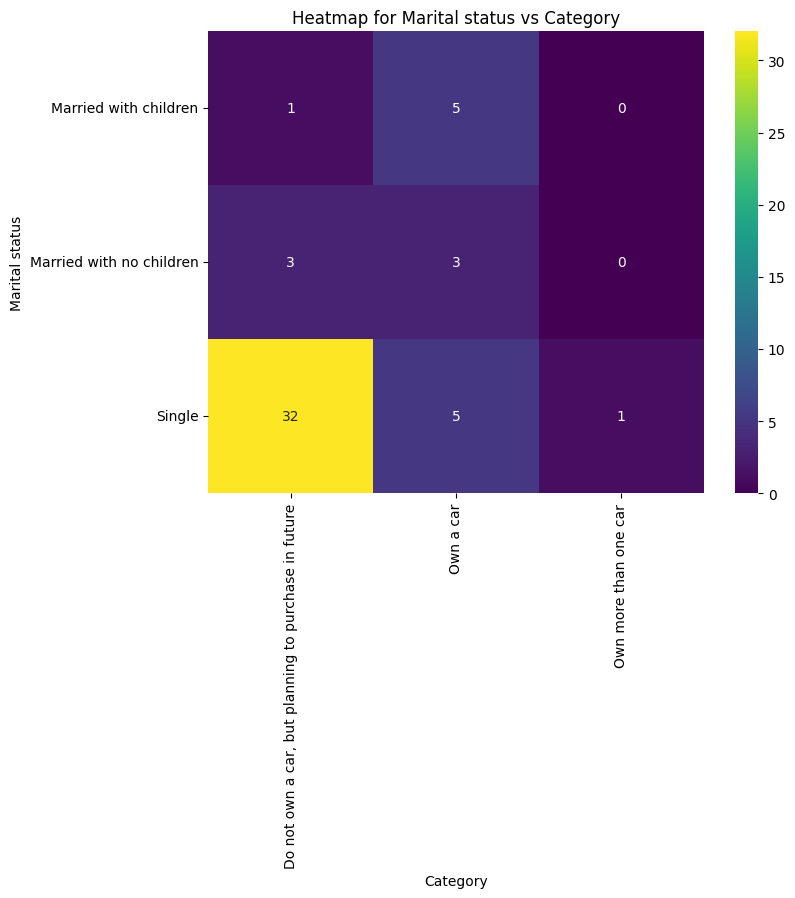

Customisation Budget vs Gender: p-value = 0.018806508257706155


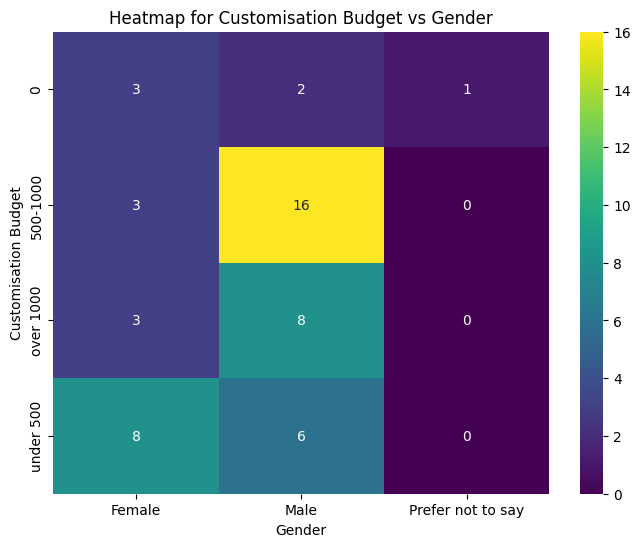

Customisation Budget vs Personalisation Budget: p-value = 1.1995300513933859e-09


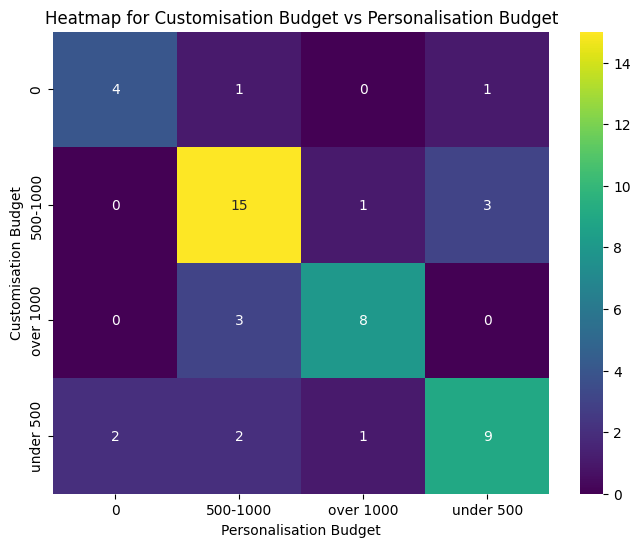

Personalisation Budget vs Customisation Budget: p-value = 1.1995300513933817e-09


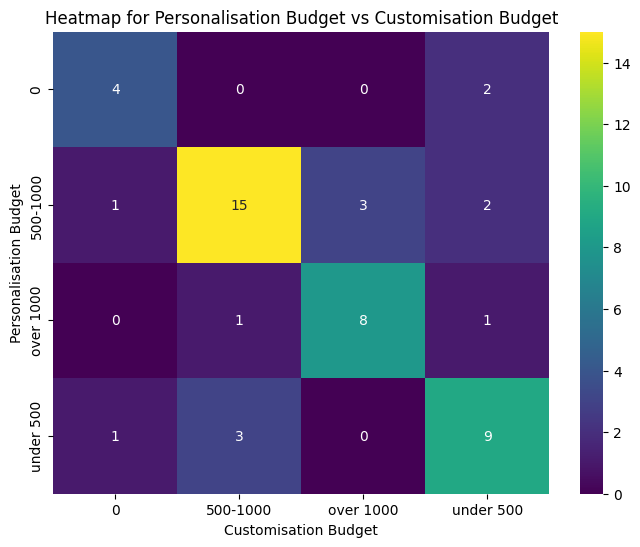

In [8]:
# Chi-Square Test
from scipy.stats import chi2_contingency

alpha = 0.05  # Set your desired significance level

significant_combinations = []

for col_cat in categorical_cols:
    for col_target in data_for_mca.columns.to_list():
        if col_target != col_cat:
            contingency_table = pd.crosstab(df[col_cat], df[col_target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
        
            if p <= alpha:
                significant_combinations.append((col_cat, col_target, p))

# Print significant combinations
for col_cat, col_target, p in significant_combinations:
    print(f"{col_cat} vs {col_target}: p-value = {p}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.crosstab(df[col_cat], df[col_target]), annot=True, cmap='viridis')
    plt.title(f"Heatmap for {col_cat} vs {col_target}")
    plt.show()


In [9]:
mca.column_contributions_.head(8).style.format('{:.0%}')

,0,1
Age group_20-30,2%,3%
Age group_31-40,12%,1%
Age group_41-50,1%,8%
Age group_51-60,0%,10%
Gender_Female,4%,4%
Gender_Male,4%,1%
Gender_Prefer not to say,6%,1%
"Category_Do not own a car, but planning to purchase in future",0%,6%


In [10]:
mca.eigenvalues_


array([0.28536197, 0.27902229])

In [11]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.285,12.84%,12.84%
1,0.279,12.56%,25.40%


## **Analysis**

- Very poor explained variance retained in the top two MCA components
- Unable to retain the importance of the original categorical variables

In [12]:
loading_df: pd.DataFrame = pd.DataFrame()
for col in categorical_cols.to_list():
    mean_values = mca.column_contributions_.filter(like=col, axis=0).mean()
    formatted_df = pd.DataFrame(mean_values).T 
    formatted_df.index = [col] 
    formatted_df.columns = ['0', '1'] 
    formatted_df
    loading_df = pd.concat([loading_df, formatted_df])

loading_df

,0,1
Age group,0.036503,0.055031
Gender,0.047312,0.020667
Category,0.004469,0.079049
Marital status,0.039771,0.054289
Likelihood of customised vehicle if FOC,0.024794,0.008043
Customisation Budget,0.060512,0.021428
Interest in personalising car,0.012577,0.014453
Personalisation Budget,0.053903,0.026904
Any cadding experience,0.004781,0.028521


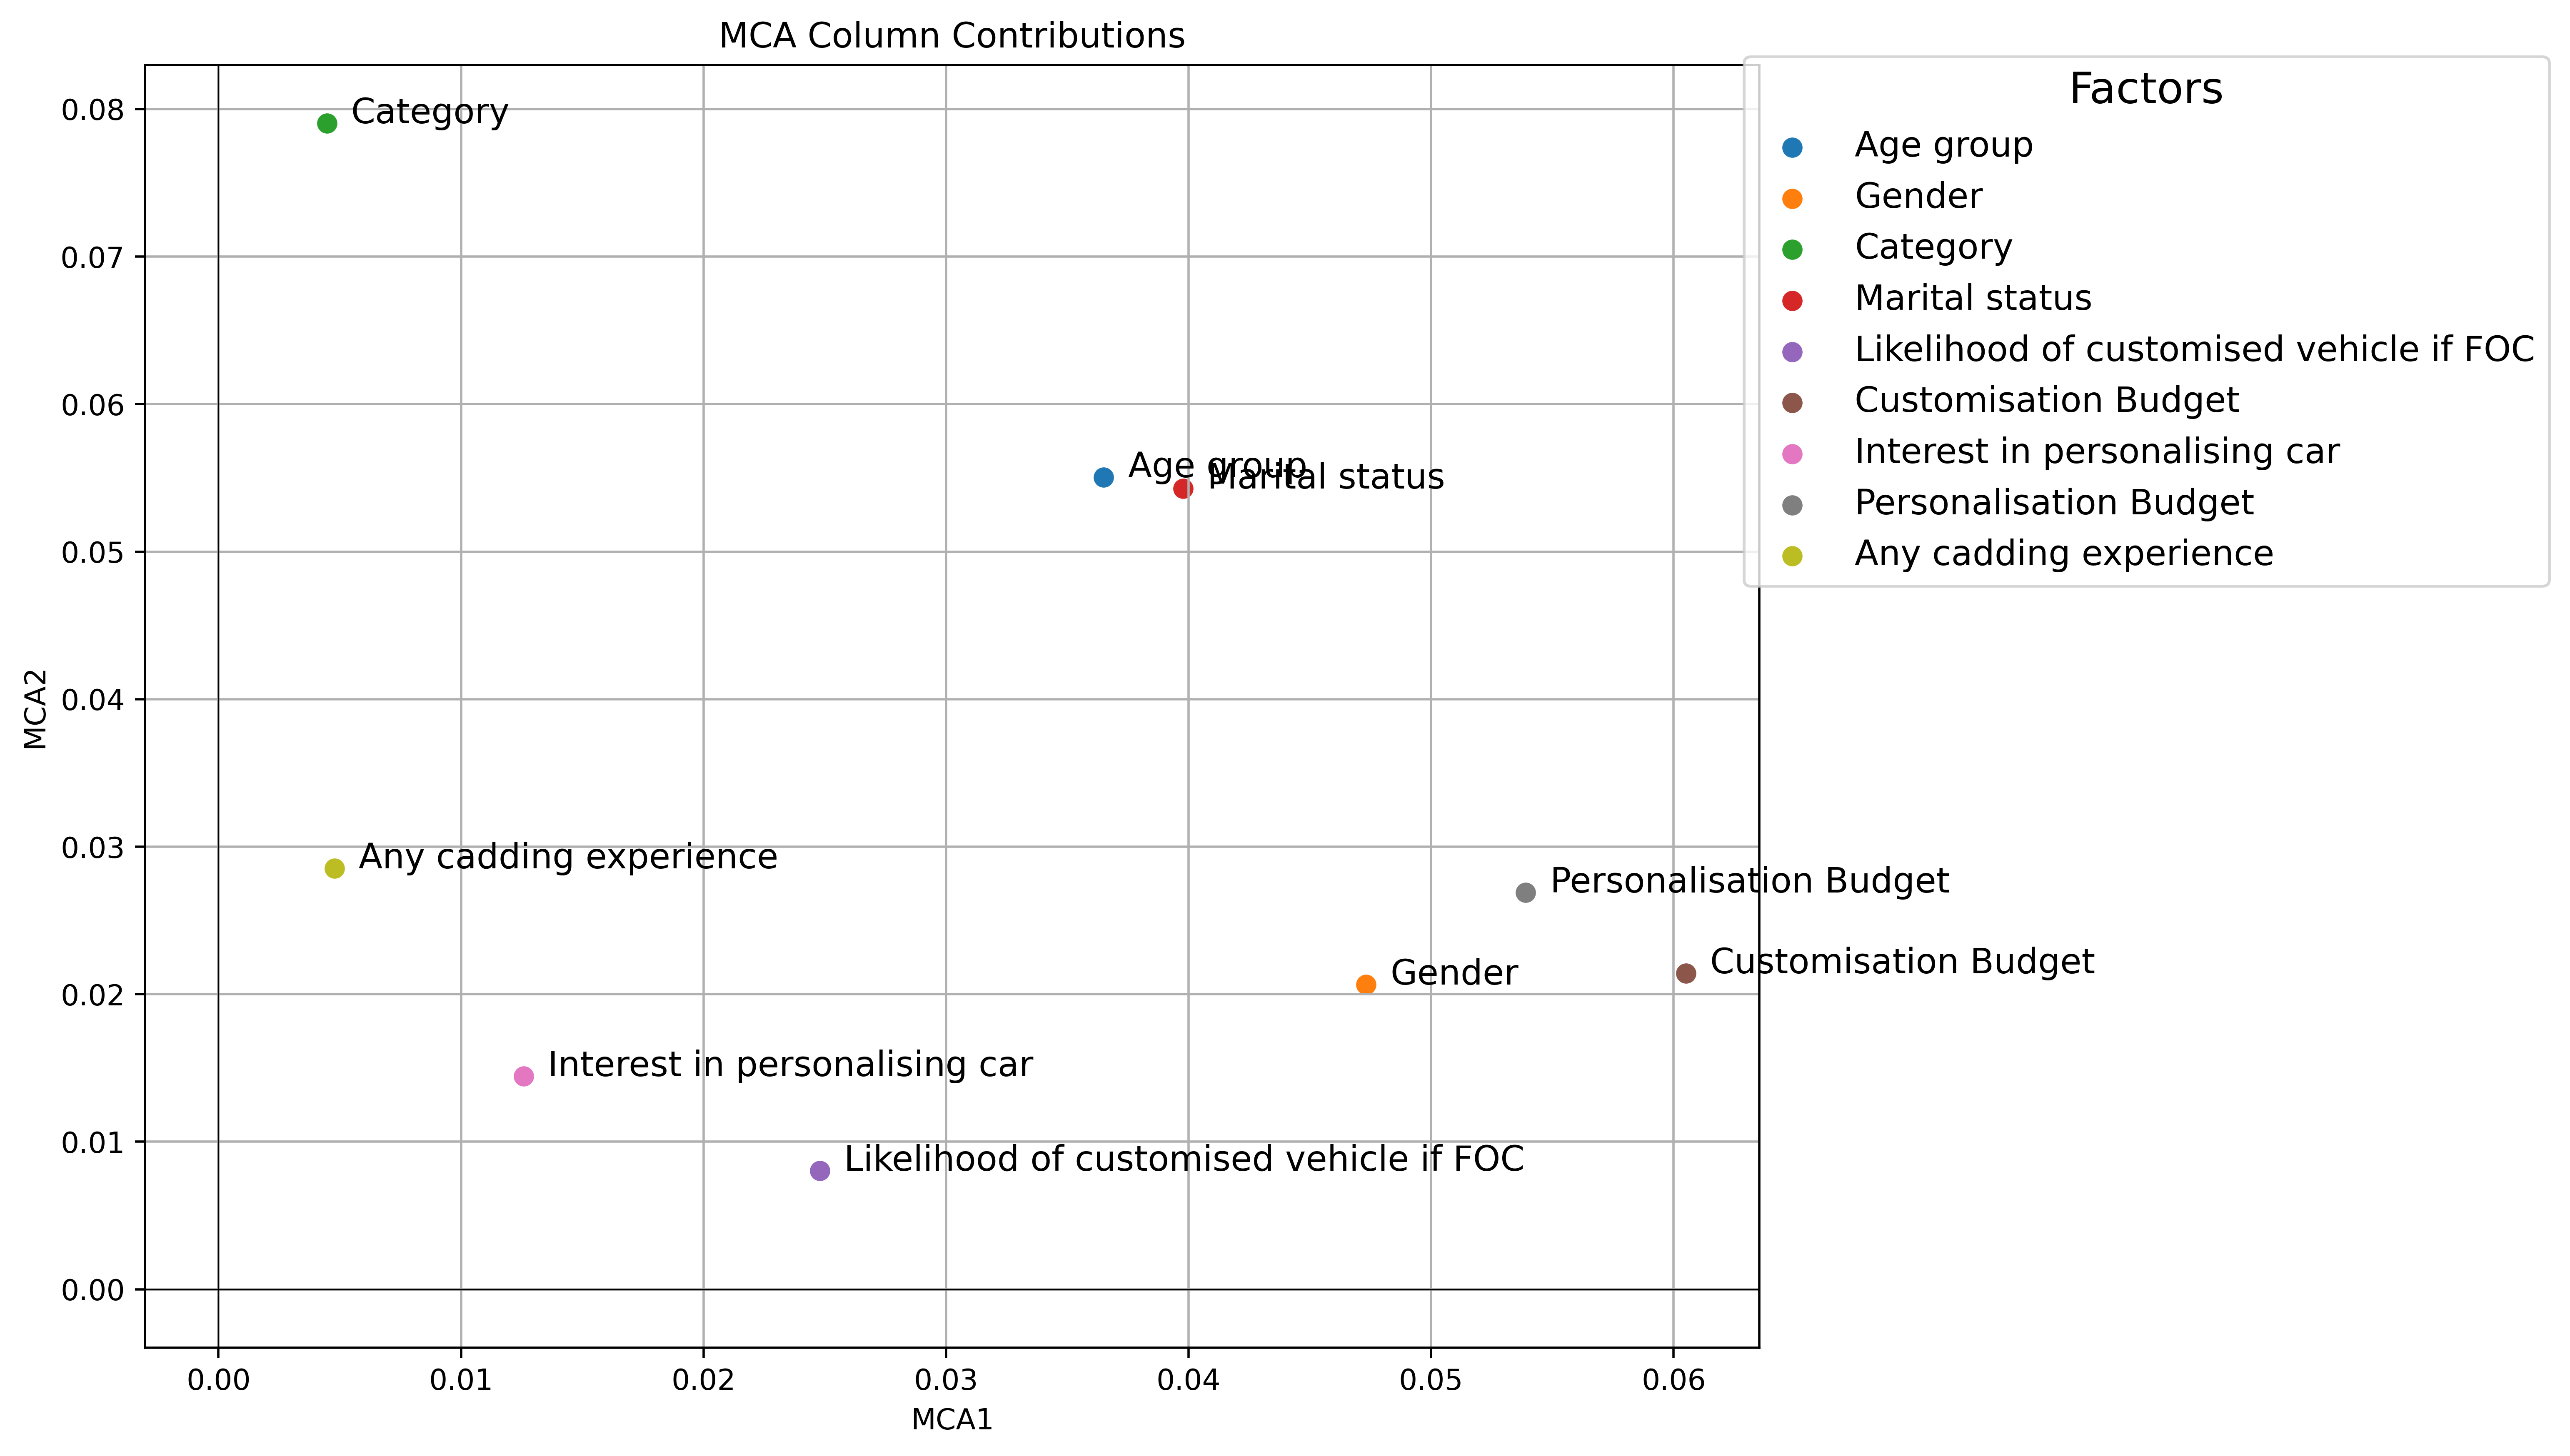

In [13]:
contributions = loading_df

# Increase the dpi for higher resolution
fig, ax = plt.subplots(figsize=(10, 8), dpi=500)

# Loop through the contributions and plot each as an arrow
for i, row in contributions.iterrows():
    ax.scatter(row[0], row[1], label=i, cmap='viridis')  # Plot the dots
    plt.text(row[0] + 0.001, row[1], i, fontsize=12)  

# Set titles and labels
plt.title('MCA Column Contributions')
plt.xlabel('MCA1')
plt.ylabel('MCA2')
plt.axhline(0, color='black', lw=0.5)  
plt.axvline(0, color='black', lw=0.5)  
plt.grid(True) 

ax.legend(title='Factors', title_fontsize='15', fontsize='12', loc='right', bbox_to_anchor=(1.5, 0.8))
plt.show()
